### READ DATA 

In [1]:
import pandas as pd
data = pd.read_csv("AmesHousing.txt",delimiter="\t")
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### Divide dataset to train and test datasets.display information about each column.Define target column

In [2]:
train = data.iloc[:1460]
test = data.iloc[1460:]
target = "SalePrice"
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

In [3]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

#### Find feature that seems like it has the strongest correlation with the final sale price

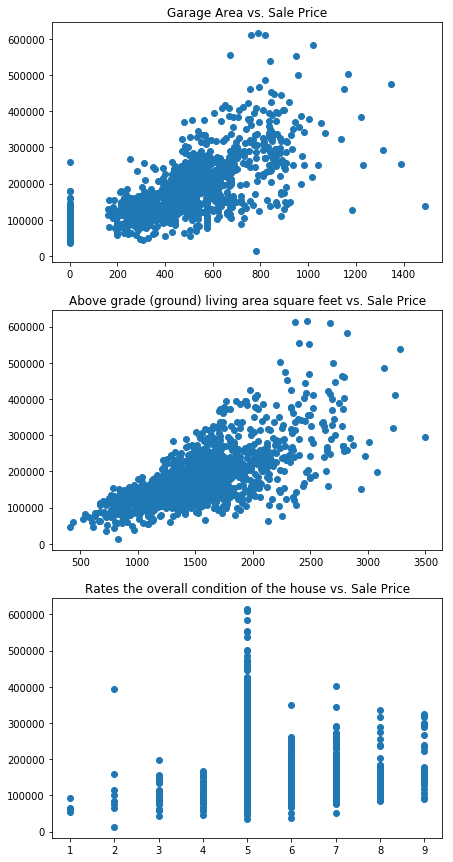

In [4]:
import matplotlib.pyplot as plt
# For prettier plots.
import seaborn
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

ax1.scatter(train["Garage Area"],train["SalePrice"])
ax1.set_title("Garage Area vs. Sale Price")
ax2.scatter(train["Gr Liv Area"],train["SalePrice"])
ax2.set_title("Above grade (ground) living area square feet vs. Sale Price")
ax3.scatter(train["Overall Cond"],train["SalePrice"])
ax3.set_title("Rates the overall condition of the house vs. Sale Price")
plt.show()

#### Calculate the correlation with pandas.DataFrame.corr() method

In [5]:
train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.465366,-0.132401,0.662397
Gr Liv Area,0.465366,1.000000,-0.133710,0.698990
Overall Cond,-0.132401,-0.133710,1.000000,-0.099395
SalePrice,0.662397,0.698990,-0.099395,1.000000


The correlation between Gr Liv Area and SalePrice is around 0.7, which is the highest. Recall that the closer the correlation coefficient is to 1.0, the stronger the correlation.

#### Using scikit-learn for linear regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']],train["SalePrice"])
print("coef_ or a1 : ",lr.coef_)
print("intercept_ or a0 : ",lr.intercept_)
a1 = lr.coef_
a0 = lr.intercept_

coef_ or a1 :  [ 116.86624683]
intercept_ or a0 :  5366.82171006


General form of LinearRegression is y^ = a1*x1 + a0  
y^ : is predicted value of target column
x1 : is feature column
a1 : coef_ attribute
a0 : intercept_ attribute

on our example 'Gr Liv Area' column is feature column. target column is "SalePrice" column.
y^ = 116.9 * ['Gr Liv Area'] + 5366.8


One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.9 dollars"

#### RMSE value for the predictions on the training set and test set

In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
prediction_train = lr.predict(train[['Gr Liv Area']]) 
train_mse = mean_squared_error(prediction_train,train['SalePrice'])
train_rmse = np.sqrt(train_mse)


prediction_test = lr.predict(test[['Gr Liv Area']])
test_mse = mean_squared_error(prediction_test,test['SalePrice'])
test_rmse = np.sqrt(test_mse)

print("train_rmse",train_rmse)
print("test_rmse",test_rmse)


train_rmse 56034.3620014
test_rmse 57088.2516126


#### RMSE values for multiple columns

In [8]:
cols = ['Overall Cond', 'Gr Liv Area']

lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])
prediction_train2 = lr.predict(train[cols]) 
train_mse2 = mean_squared_error(prediction_train2,train['SalePrice'])
train_rmse_2 = np.sqrt(train_mse2)


prediction_test2 = lr.predict(test[cols])
test_mse2 = mean_squared_error(prediction_test2,test['SalePrice'])
test_rmse_2 = np.sqrt(test_mse2)

print("train_rmse_2",train_rmse_2)
print("test_rmse_2",test_rmse_2)

train_rmse_2 56032.3980153
test_rmse_2 57066.9077945


Multiple linear regression formul

y^ = a0 + a1*x1 + a2*x2 + ........... + an*xn

### Select features for linear regression

In [9]:
numerical_train = train.select_dtypes(include=['int64', 'float64'])
numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Mas Vnr Area       1449 non-null float64
BsmtFin SF 1       1459 non-null float64
BsmtFin SF 2       1459 non-null float64
Bsmt Unf SF        1459 non-null float64
Total Bsmt SF      1459 non-null float64
1st Flr SF         1460 non-null int64
2nd Flr SF         1460 non-null int64
Low Qual Fin SF    1460 non-null int64
Gr Liv Area        1460 non-null int64
Bsmt Full Bath     1459 non-null float64
Bsmt Half Bath     1459 non-null float64
Full Bath          1460 non-null int64
Half Bath          1460 non-null int64
Bedroom AbvGr      

#### Select from feature columns that don't have any missing values or don't need to be transformed to be useful

In [10]:
null_series = numerical_train.isnull().sum() # calculate total number of null values

full_cols_series = null_series[null_series == 0]
full_cols_series

Order              0
PID                0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

#### Compute the pairwise correlation coefficients between all of the columns

In [11]:
train_subset = train[full_cols_series.index]
corr_col = train_subset[train_subset.columns].corr()
corr_col

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
Order,1.000000,0.211255,-0.023140,0.020064,-0.049116,0.078547,-0.126358,-0.066825,-0.060288,0.011011,...,-0.064436,0.035471,0.013040,0.006725,0.026088,0.020716,-0.020449,0.239654,-0.929948,-0.068181
PID,0.211255,1.000000,-0.015336,0.022231,-0.276886,0.109383,-0.388924,-0.156529,-0.190878,0.026015,...,-0.036096,-0.065553,0.174018,-0.042926,-0.023127,-0.023739,-0.005212,-0.065338,0.101723,-0.259920
MS SubClass,-0.023140,-0.015336,1.000000,-0.248209,0.054533,-0.099862,0.031562,0.050451,-0.273248,0.342229,...,-0.034953,0.000592,0.009778,-0.051771,-0.065956,-0.022696,-0.023721,-0.007870,0.000161,-0.088504
Lot Area,0.020064,0.022231,-0.248209,1.000000,0.100290,-0.010353,0.031821,0.023912,0.295995,0.005407,...,0.110003,0.044313,0.002098,0.022090,0.054119,0.010442,0.025428,0.001255,-0.004406,0.274730
Overall Qual,-0.049116,-0.276886,0.054533,0.100290,1.000000,-0.083581,0.605032,0.565827,0.490056,0.200105,...,0.260258,0.319954,-0.173024,0.032751,0.023194,0.072357,-0.009641,-0.001169,-0.072218,0.804562
Overall Cond,0.078547,0.109383,-0.099862,-0.010353,-0.083581,1.000000,-0.355129,0.084612,-0.154903,-0.009733,...,0.045171,-0.013770,0.052764,0.033923,0.064596,-0.013420,0.047354,0.017628,-0.035198,-0.099395
Year Built,-0.126358,-0.388924,0.031562,0.031821,0.605032,-0.355129,1.000000,0.576853,0.329175,0.013488,...,0.249314,0.191260,-0.404219,0.039735,-0.034249,0.027601,-0.028589,-0.020661,-0.001975,0.591436
Year Remod/Add,-0.066825,-0.156529,0.050451,0.023912,0.565827,0.084612,0.576853,1.000000,0.245251,0.137990,...,0.238683,0.262630,-0.227862,0.024798,-0.048432,0.023106,-0.020871,-0.019212,-0.009300,0.545219
1st Flr SF,-0.060288,-0.190878,-0.273248,0.295995,0.490056,-0.154903,0.329175,0.245251,1.000000,-0.311660,...,0.206013,0.191891,-0.118127,0.053525,0.120276,0.092472,-0.000546,0.018693,-0.003644,0.657119
2nd Flr SF,0.011011,0.026015,0.342229,0.005407,0.200105,-0.009733,0.013488,0.137990,-0.311660,1.000000,...,0.086069,0.189739,0.074540,-0.038210,-0.014297,-0.020832,0.002249,0.016789,-0.033303,0.202352


#### Select just the SalePrice column from the resulting data frame, compute the absolute value of each term, sort the resulting Series by the correlation values

In [12]:
absolute = corr_col.abs()
sorted_corrs = absolute["SalePrice"].sort_values()
sorted_corrs

Misc Val           0.009903
Mo Sold            0.011901
3Ssn Porch         0.038699
Yr Sold            0.042695
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
PID                0.259920
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
Year Remod/Add     0.545219
Year Built         0.591436
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64

#### Generate heatmap to use visual representation of strong correlation between columns

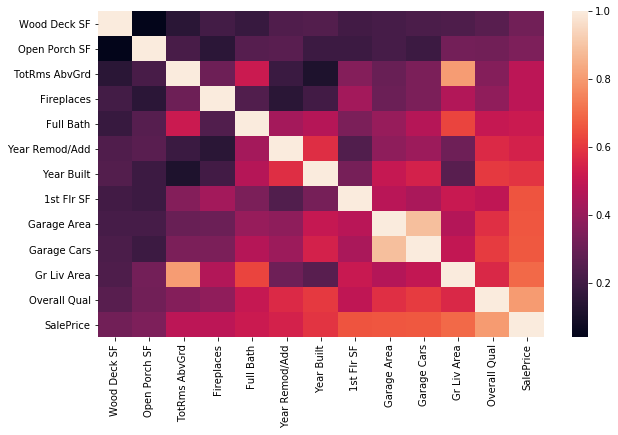

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmap = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmap)
plt.show()

#### RMSE of strong correlated columns with target column

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd']) # we drop them because they reflect similar information with Gr Liv Area and Garage Area
features = final_corr_cols.drop(['SalePrice']).index 
target = 'SalePrice'
clean_test = test[final_corr_cols.index].dropna()  # we clean test set like training set

lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("train_rmse",train_rmse)
print("test_rmse",test_rmse)

train_rmse 32222.0950202
test_rmse 40376.5010814


#### Removing features with low variance

In [15]:
unit_train = train[features]/(train[features].max())
sorted_vars = unit_train.var().sort_values()
print(sorted_vars)

Year Remod/Add    0.000107
Year Built        0.000228
Open Porch SF     0.013938
Gr Liv Area       0.018014
Full Bath         0.018621
1st Flr SF        0.019182
Overall Qual      0.019842
Garage Area       0.020347
Wood Deck SF      0.033064
Fireplaces        0.046589
dtype: float64


#### Set a cutoff variance of 0.015, remove the Open Porch SF feature, and train and test a model using the remaining features.

In [16]:
features = features.drop(["Open Porch SF"])

clean_test = test[final_corr_cols.index].dropna()

lr = LinearRegression()
lr.fit(train[features],train['SalePrice'])

train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

print(train_rmse_2)
print(test_rmse_2)

32346.004448
39994.0192439


#### Find a1 parameter in y^ = a1*x1 model with cost function(or loss function) 

In [17]:
def derivative(a1, xi_list, yi_list):
    len_x = len(xi_list)
    error = 0
    for i in range(0,len_x):
        error += xi_list[i]*(a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_x
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)


param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150)
final_param = param_iterations[-1]
final_param

120.14219147202738

#### Find a0 and a1 parameters in y^ = a0 + a1*x1 model with cost function(or loss function) 

In [18]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv
def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)


a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)
print(a0_params)
print(a1_params)

[1000, 999.97297978123288, 999.98590370106604, 999.98023254713905, 999.98321790150521, 999.9821734177915, 999.98300493236297, 999.98296311912168, 999.98332786351068, 999.98350334433997, 999.98376693244177, 999.98398950421347, 999.98423117017433, 999.98446394725659, 999.98470086233294, 999.98493585104279, 999.98517173650964, 999.9854072044933, 999.98564286680801, 999.98587843863777, 999.98611405257202]
[150, 105.34801721547944, 126.13471917628125, 116.45794862200977, 120.96274606972909, 118.86564116059868, 119.84189984026605, 119.38742488614261, 119.59899502291616, 119.50050320781361, 119.54635359313434, 119.52500879150305, 119.53494516153384, 119.53031930255781, 119.53247255390217, 119.53146994657168, 119.53193647656232, 119.53171908350993, 119.53182007507831, 119.53177285001942, 119.53179462379771]


#### Find optimal parameter values(a0,a1,a2...an) with OLS estimation formula

In [19]:
features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual']

X = train[features]
y = train["SalePrice"]
a = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)
a

array([    53.75693376,  18232.31375751,  -6434.65300989,     22.53151963,
           86.81522574,     28.08976713,  11397.64135314])

OLS estimation formula is ** a = (X^TX)^{-1} X^Ty **